In [23]:
import pandas as pd

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


2016-08-23


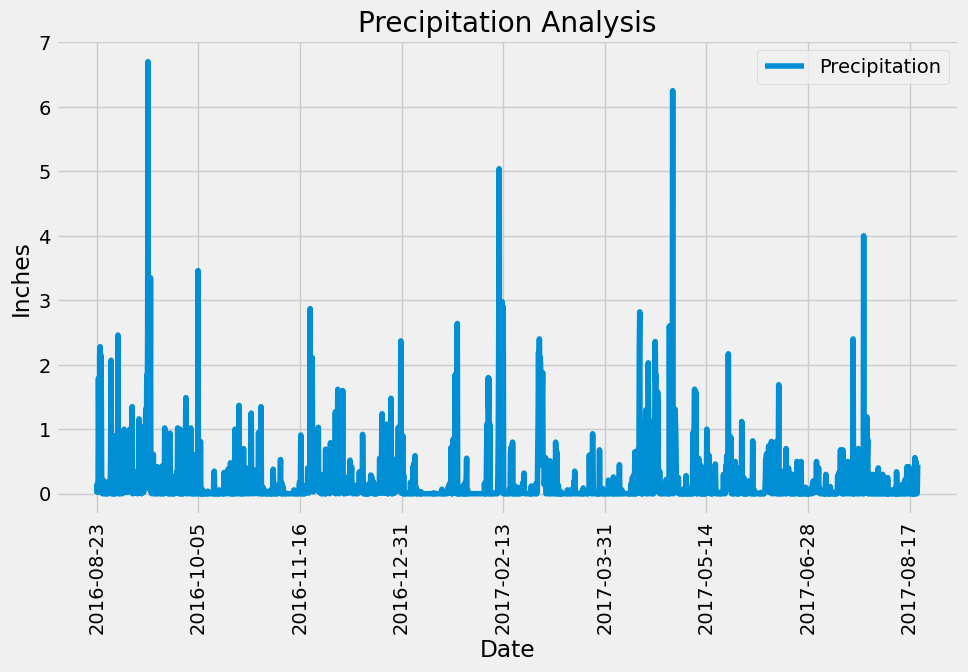

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_data_point
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores

year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago, Measurement.prcp != None).\
    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_prcp, columns=['Date', 'Precipitation'])
df.head()

# Sort the dataframe by date
df.set_index('Date', inplace=True)
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10,6))
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis")
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('output/Precipitation.png')

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(locations))


There are 9 stations.


In [19]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
result

[(54.0, 85.0, 71.66378066378067)]

Most Active Station ID: USC00519281


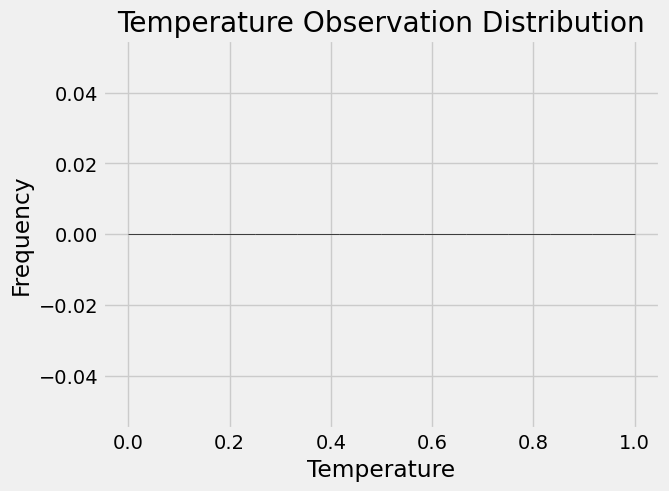

In [24]:
# Using the most active station id
    
active_stations = session.query(
    Measurement.station,
    func.count(Measurement.station)
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

if active_stations:
    most_active_station = active_stations[0]
    print("Most Active Station ID:", most_active_station)
else:
    print("No active stations found.")

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#temp_df=pd.DataFrame(temperature)
#tobs_df.plot.hist(by='station', bins=12, figsize=(12,8))
#plt.grid()
#plt.title("Temperature Observations for Station " + best_station, fontsize=20)
#plt.xlabel("Temperature Reported", fontsize=16)
#plt.legend(bbox_to_anchor=(1,1), fontsize=16)
#plt.savefig("../StationTemps.png")
#plt.sho

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= '2022-05-24').filter(Measurement.date <= '2023-05-24').all()

# Extract the temperature values from the query result
temperatures = [temp[0] for temp in temperature_data]

# Create a histogram
plt.hist(temperatures, bins=12, edgecolor='black')

# Set labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observation Distribution')

# Display the histogram
plt.show()


# Close Session

In [22]:
# Close Session
session.close()